Code (partially) taken from: https://gist.github.com/sagarmainkar/41d135a04d7d3bc4098f0664fe20cf3c, and explanations are also at https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

In [91]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline
plt.style.use(['ggplot'])

Create Data
Generate some data with: W0 (T0 or b) = 4.
T1 = 3, so that the line really is y = 3x + 4, but we'll add some Gausian noise

In [92]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X+np.random.randn(100,1)

Plot it...

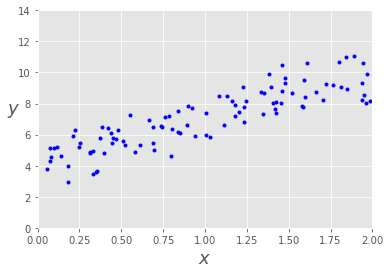

In [93]:
plt.plot(X,y,'b.') #makes the circles blue
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,14])

Solve the function in the "old" linear algebra way (not gradient descent) and plot it...

In [94]:
X_b = np.c_[np.ones((100,1)),X] #.concatenate = c and this puts all 100 points 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.24742784]
 [2.85235182]]


[[4.24742784]
 [9.95213148]]


(0.0, 2.0, 0.0, 15.0)

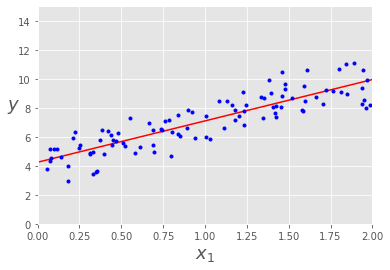

In [95]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best) #find out the values for the line at 0 and 2
print(y_predict) #print that line
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

Now let's do this with gradient descent. 

In [96]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the number of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [124]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        temp=abs(cost_history[it]-cost_history[it-1])
        #print(str(it) + " Iteration and temp " + str(temp))
        if (temp<0.01):
            cost_history=np.trim_zeros(cost_history)
            #print(cost_history)
            return theta, cost_history, theta_history
    return theta, cost_history, theta_history

In [127]:
alpha =0.05
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,alpha,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.226,
Theta1:          2.871
Final cost/MSE:  4181.556


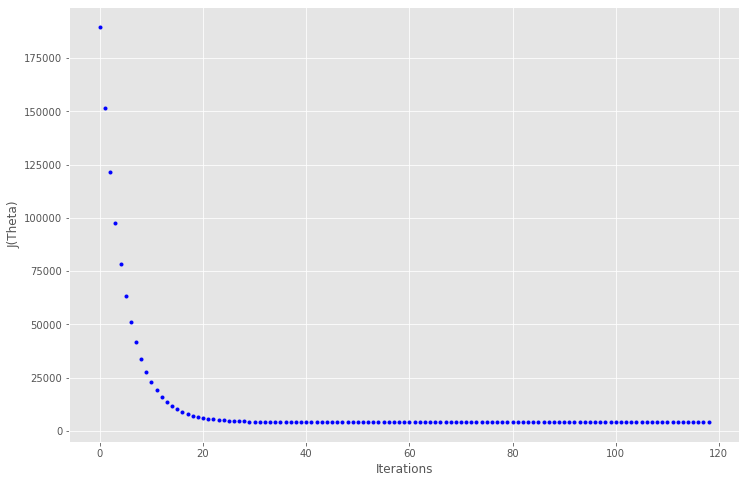

In [128]:

fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(0,len(cost_history)),cost_history,'b.')